In [ ]:
# plotting
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#scikit learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ramen_data = pd.read_csv('ramen-ratings.csv') # Read .csv into a Pandas dataframe

# Drop useless data
ramen_data = ramen_data.drop('Top Ten', axis = 1) # Drop Top Ten column
ramen_data = ramen_data.drop('Review #', axis = 1) # Drop Review # column

ramen_data.head() # Display new dataframe

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75


In [ ]:
# Filtering out less common brands
brand_list = ramen_data["Brand"].tolist() # Converting brand column to a list
brand_list = list(filter(('Nissin').__ne__, brand_list)) # Removing 'Niassan' brand from list
brand_list = list(filter(('Nongshim').__ne__, brand_list)) # Removing 'Nongshim' brand from list
brand_list = list(filter(('Maruchan').__ne__, brand_list)) # Removing 'Maruchan' brand from list
brand_list = list(filter(('Mama').__ne__, brand_list)) # Removing 'Mama' brand from list
brand_list = list(filter(('Paldo').__ne__, brand_list)) # Removing 'Paldo' brand from list

# Filtering out less common varieties
variety_list = ramen_data["Variety"].tolist() # Converting variety column to a list
variety_list = list(filter(('Chicken').__ne__, variety_list)) # Removing 'Chicken' brand from list
variety_list = list(filter(('Beef').__ne__, variety_list)) # Removing 'Beef' brand from list
variety_list = list(filter(('Artificial Chicken').__ne__, variety_list)) # Removing 'Artificial Chicken' brand from list
variety_list = list(filter(('Yakisoba').__ne__, variety_list)) # Removing 'Yakisoba' brand from list
variety_list = list(filter(('Vegetable').__ne__, variety_list)) # Removing 'Vegetable' brand from list

# Replacing less frequent values
ramen_data = ramen_data.replace(to_replace = brand_list, value ="other_brand") # Replacing minor brands with 'other_brand'
ramen_data = ramen_data.replace(to_replace = variety_list, value ="other_variety") # Replacing minor varieties with 'other_variety'

ramen_data.head()

,Brand,Variety,Style,Country,Stars
0,other_brand,other_variety,Cup,Japan,3.75
1,other_brand,other_variety,Pack,Taiwan,1
2,Nissin,other_variety,Cup,USA,2.25
3,other_brand,other_variety,Pack,Taiwan,2.75
4,other_brand,other_variety,Pack,India,3.75


In [ ]:
# One-hot encoding columns

ramen_data = ramen_data.join(pd.get_dummies(ramen_data.Brand, prefix = 'brand')) # One-hot encode 'brand' column
ramen_data = ramen_data.join(pd.get_dummies(ramen_data.Variety, prefix = 'variety')) # One-hot encode 'vareity column
ramen_data = ramen_data.join(pd.get_dummies(ramen_data.Style, prefix = 'style')) # One-hot encode 'style' column
ramen_data = ramen_data.join(pd.get_dummies(ramen_data.Country, prefix = 'country')) # One-hot encode 'country' column

ramen_data.head() #Display new dataframe after one-hot encoding

,Brand,Variety,Style,Country,Stars,brand_Mama,brand_Maruchan,brand_Nissin,brand_Nongshim,brand_Paldo,brand_other_brand,variety_Artificial Chicken,variety_Beef,variety_Chicken,variety_Vegetable,variety_Yakisoba,variety_other_variety,style_Bar,style_Bowl,style_Box,style_Can,style_Cup,style_Pack,style_Tray,country_Australia,country_Bangladesh,country_Brazil,country_Cambodia,country_Canada,country_China,country_Colombia,country_Dubai,country_Estonia,country_Fiji,country_Finland,country_Germany,country_Ghana,country_Holland,country_Hong Kong,country_Hungary,country_India,country_Indonesia,country_Japan,country_Malaysia,country_Mexico,country_Myanmar,country_Nepal,country_Netherlands,country_Nigeria,country_Pakistan,country_Philippines,country_Poland,country_Sarawak,country_Singapore,country_South Korea,country_Sweden,country_Taiwan,country_Thailand,country_UK,country_USA,country_United States,country_Vietnam
0,other_brand,other_variety,Cup,Japan,3.75,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,other_brand,other_variety,Pack,Taiwan,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Nissin,other_variety,Cup,USA,2.25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,other_brand,other_variety,Pack,Taiwan,2.75,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,other_brand,other_variety,Pack,India,3.75,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ramen_data = ramen_data.drop('Brand', axis = 1) # Drop old 'Brand' column
ramen_data = ramen_data.drop('Variety', axis = 1) # Drop old 'Variety' column
ramen_data = ramen_data.drop('Style', axis = 1) # Drop old 'Style' column
ramen_data = ramen_data.drop('Country', axis = 1) # Drop old 'Country' column

ramen_data.head() # Display new dataframe

,Stars,brand_Mama,brand_Maruchan,brand_Nissin,brand_Nongshim,brand_Paldo,brand_other_brand,variety_Artificial Chicken,variety_Beef,variety_Chicken,variety_Vegetable,variety_Yakisoba,variety_other_variety,style_Bar,style_Bowl,style_Box,style_Can,style_Cup,style_Pack,style_Tray,country_Australia,country_Bangladesh,country_Brazil,country_Cambodia,country_Canada,country_China,country_Colombia,country_Dubai,country_Estonia,country_Fiji,country_Finland,country_Germany,country_Ghana,country_Holland,country_Hong Kong,country_Hungary,country_India,country_Indonesia,country_Japan,country_Malaysia,country_Mexico,country_Myanmar,country_Nepal,country_Netherlands,country_Nigeria,country_Pakistan,country_Philippines,country_Poland,country_Sarawak,country_Singapore,country_South Korea,country_Sweden,country_Taiwan,country_Thailand,country_UK,country_USA,country_United States,country_Vietnam
0,3.75,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2.25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2.75,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.75,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Removing unrated ramens

unrated_index_list = ramen_data.index[ramen_data['Stars'] == 'Unrated'].tolist() # Getting list of indexes of rows of unrated ramens

ramen_data = ramen_data.drop(unrated_index_list) # Removing rows with unrated ramens

ramen_data.head() # Displaying new dataframe

,Stars,brand_Mama,brand_Maruchan,brand_Nissin,brand_Nongshim,brand_Paldo,brand_other_brand,variety_Artificial Chicken,variety_Beef,variety_Chicken,variety_Vegetable,variety_Yakisoba,variety_other_variety,style_Bar,style_Bowl,style_Box,style_Can,style_Cup,style_Pack,style_Tray,country_Australia,country_Bangladesh,country_Brazil,country_Cambodia,country_Canada,country_China,country_Colombia,country_Dubai,country_Estonia,country_Fiji,country_Finland,country_Germany,country_Ghana,country_Holland,country_Hong Kong,country_Hungary,country_India,country_Indonesia,country_Japan,country_Malaysia,country_Mexico,country_Myanmar,country_Nepal,country_Netherlands,country_Nigeria,country_Pakistan,country_Philippines,country_Poland,country_Sarawak,country_Singapore,country_South Korea,country_Sweden,country_Taiwan,country_Thailand,country_UK,country_USA,country_United States,country_Vietnam
0,3.75,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2.25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2.75,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.75,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
stars_list = ramen_data['Stars'].tolist() # Taking current 'Stars' column into a list

# Converting all strings into floats
for i in range(len(stars_list)):
  stars_list[i] = float(stars_list[i])

ramen_data = ramen_data.drop('Stars', axis = 1) # Drop old 'Stars' column with strings
ramen_data['Stars'] = stars_list # Add in new 'Stars' column with floats

ramen_data.head()

,brand_Mama,brand_Maruchan,brand_Nissin,brand_Nongshim,brand_Paldo,brand_other_brand,variety_Artificial Chicken,variety_Beef,variety_Chicken,variety_Vegetable,variety_Yakisoba,variety_other_variety,style_Bar,style_Bowl,style_Box,style_Can,style_Cup,style_Pack,style_Tray,country_Australia,country_Bangladesh,country_Brazil,country_Cambodia,country_Canada,country_China,country_Colombia,country_Dubai,country_Estonia,country_Fiji,country_Finland,country_Germany,country_Ghana,country_Holland,country_Hong Kong,country_Hungary,country_India,country_Indonesia,country_Japan,country_Malaysia,country_Mexico,country_Myanmar,country_Nepal,country_Netherlands,country_Nigeria,country_Pakistan,country_Philippines,country_Poland,country_Sarawak,country_Singapore,country_South Korea,country_Sweden,country_Taiwan,country_Thailand,country_UK,country_USA,country_United States,country_Vietnam,Stars
0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.75
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.00
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.25
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.75
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.75


In [ ]:
x = ramen_data.iloc[:,:-1]
y = ramen_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
random_forrest = RandomForestRegressor()
random_forrest.fit(x_train, y_train)
random_forrest_predictions = random_forrest.predict(x_test)

print('R2: ' + str(metrics.r2_score(y_test, random_forrest_predictions)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, random_forrest_predictions)))

R2: 0.07406059104101792
MSE: 0.9373442649890261


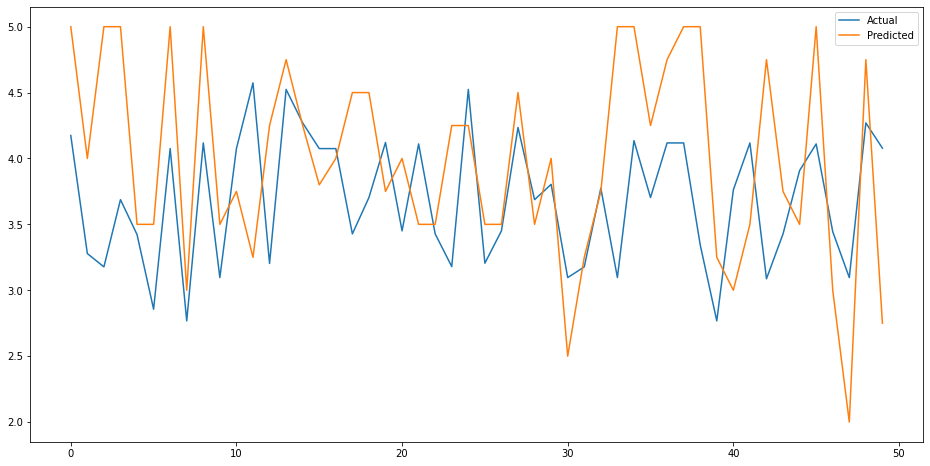

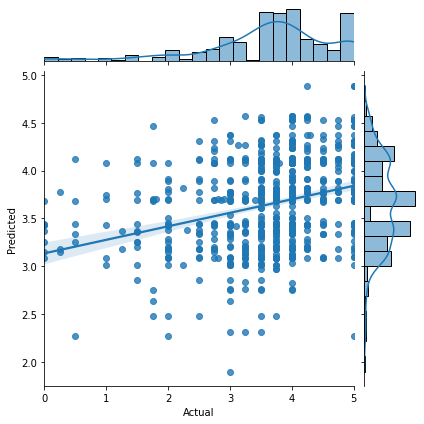

In [ ]:
test = pd.DataFrame({'Predicted':random_forrest_predictions,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);